<h2>Load data</h2>

In [1]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

# load data
df = pd.read_csv('data/glass.csv')
np_data = df.values

# split data into X and y
X_raw = np_data[:,0:9]
# Convert class label strings to integers
Y_raw = np_data[:,-1]
encoder = LabelEncoder()
encoder.fit(Y_raw)
Y = encoder.transform(Y_raw)

# Normalize attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_raw.astype(np.float64))

# shuffle data
X, Y = shuffle(X, Y, random_state=0)

# set seed to randomizer
seed = 7

print("Attributes: {}".format(X_raw.shape[1]))
print("Examples: {}".format(X_raw.shape[0]))

Attributes: 9
Examples: 214


<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()
    
    print("")
    print("-- 3-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=3)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

<h2>Linear classifier</h2>

-- Training data --
Accuracy: 71.03%
Confusion Matrix:
[[53 17  0  0  0  0]
 [18 53  2  2  0  1]
 [ 8  9  0  0  0  0]
 [ 0  2  0  9  1  1]
 [ 0  1  0  0 28  0]
 [ 0  0  0  0  0  9]]


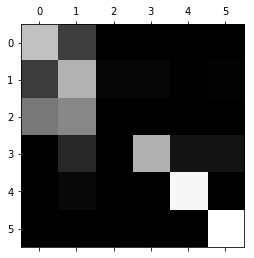


-- 3-fold CV --
Average accuracy: 65.89%
Confusion Matrix:
[[55 10  2  3  0  0]
 [23 41  3  4  3  2]
 [ 8  7  2  0  0  0]
 [ 0  4  0  8  1  0]
 [ 0  1  0  2 26  0]
 [ 0  0  0  0  0  9]]


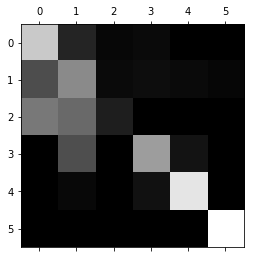

In [3]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=2000, random_state=seed)
evaluate(model)

<h2>Neural Network classifier</h2>

-- Training data --
Accuracy: 81.78%
Confusion Matrix:
[[63  7  0  0  0  0]
 [15 61  0  0  0  0]
 [ 8  8  1  0  0  0]
 [ 0  0  0 13  0  0]
 [ 1  0  0  0 28  0]
 [ 0  0  0  0  0  9]]


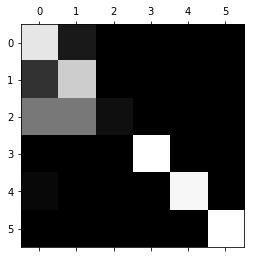


-- 3-fold CV --
Average accuracy: 68.22%
Confusion Matrix:
[[50 15  5  0  0  0]
 [15 54  3  2  1  1]
 [ 6  7  4  0  0  0]
 [ 0  3  0  7  3  0]
 [ 0  4  0  1 24  0]
 [ 0  0  0  1  1  7]]


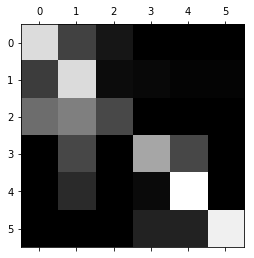

In [4]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=2000, random_state=seed)
evaluate(model)

<h2>Decision Tree classifier</h2>

-- Training data --
Accuracy: 83.64%
Confusion Matrix:
[[63  6  0  0  1  0]
 [ 3 69  0  1  1  2]
 [ 7  5  5  0  0  0]
 [ 0  1  0 11  1  0]
 [ 1  1  0  0 26  1]
 [ 2  2  0  0  0  5]]


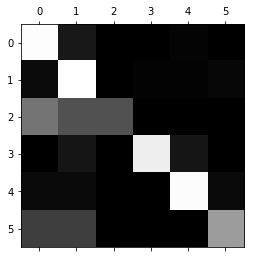


-- 3-fold CV --
Average accuracy: 64.49%
Confusion Matrix:
[[47 21  1  0  1  0]
 [15 50  6  3  1  1]
 [ 8  3  6  0  0  0]
 [ 0  1  0 10  1  1]
 [ 1  2  0  1 25  0]
 [ 1  2  3  3  0  0]]


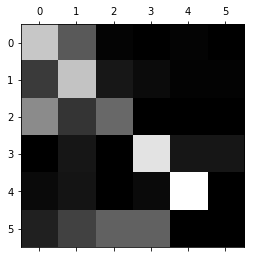

In [5]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed)
evaluate(model)

<h2>SVM classifier</h2>

-- Training data --
Accuracy: 78.97%
Confusion Matrix:
[[59 11  0  0  0  0]
 [15 61  0  0  0  0]
 [10  7  0  0  0  0]
 [ 0  0  0 13  0  0]
 [ 1  0  0  0 28  0]
 [ 0  1  0  0  0  8]]


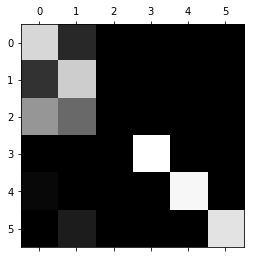


-- 3-fold CV --
Average accuracy: 70.09%
Confusion Matrix:
[[57 13  0  0  0  0]
 [15 60  0  1  0  0]
 [10  7  0  0  0  0]
 [ 0  7  0  6  0  0]
 [ 1  5  0  0 23  0]
 [ 2  3  0  0  0  4]]


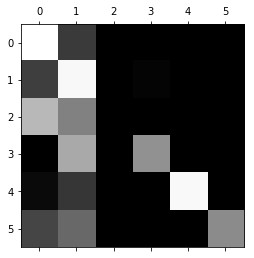

In [6]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed)
evaluate(model)

<h2>kNN classifier</h2>

-- Training data --
Accuracy: 83.64%
Confusion Matrix:
[[70  0  0  0  0  0]
 [14 62  0  0  0  0]
 [ 6  5  6  0  0  0]
 [ 1  2  0 10  0  0]
 [ 1  3  0  1 24  0]
 [ 0  2  0  0  0  7]]


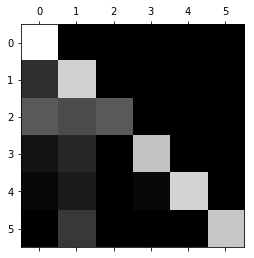


-- 3-fold CV --
Average accuracy: 71.50%
Confusion Matrix:
[[63  6  1  0  0  0]
 [21 54  0  1  0  0]
 [14  2  1  0  0  0]
 [ 1  5  0  6  1  0]
 [ 3  2  0  1 23  0]
 [ 0  2  0  0  1  6]]


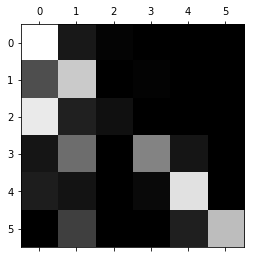

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=2)
evaluate(model)

<h2>XGBoost classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[70  0  0  0  0  0]
 [ 0 76  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 29  0]
 [ 0  0  0  0  0  9]]


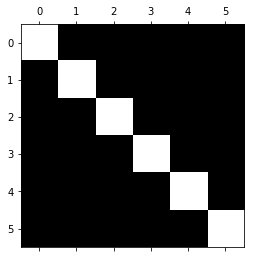


-- 3-fold CV --
Average accuracy: 81.31%
Confusion Matrix:
[[61  6  2  0  0  1]
 [ 6 63  3  2  1  1]
 [ 8  4  4  0  0  1]
 [ 0  1  0 11  1  0]
 [ 1  0  0  2 26  0]
 [ 0  0  0  0  0  9]]


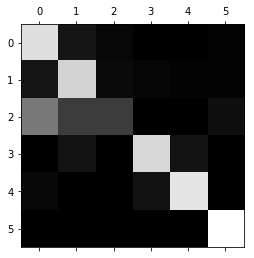

In [8]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

<h2>Plot attributes</h2>

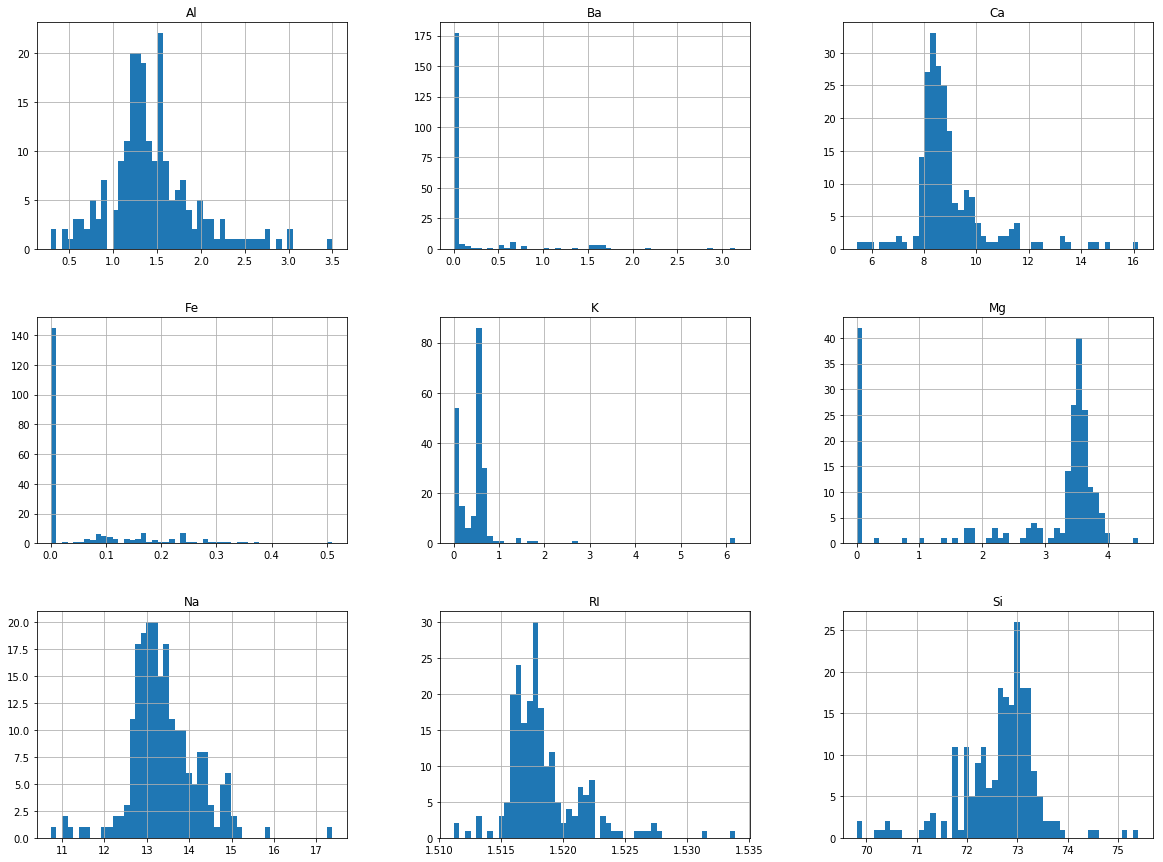

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()